In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

seed = 231094

# Exploring High Dimensional Data in Python

It's important when working with high dimensional data (< 10 columns) that we are able to identify and use only the most important features. This can be achieved by both feature selection and feature extraction. 

## Feature Selection

In [3]:
loan = pd.DataFrame({
    'Income': np.arange(5000,10000,1000),
    'Age': np.arange(20, 30, 2),
    'Hair Color': ['Blue', 'Red', 'Yello', 'Green', 'Black']
})

loan

,Income,Age,Hair Color
0,5000,20,Blue
1,6000,22,Red
2,7000,24,Yello
3,8000,26,Green
4,9000,28,Black


It should be clear that when prediciting wether or not someone will pay back a loan that hair color doesn't matter as a predictor. 

In [4]:
loan.drop(labels = 'Hair Color', axis = 1, inplace = True)
loan

,Income,Age
0,5000,20
1,6000,22
2,7000,24
3,8000,26
4,9000,28


For higher dimensional data seaborns pairplot can help.

In [5]:
ansur = pd.read_csv('/Users/Dillon/OneDrive/Documents/DataCampML/ANSUR II MALE Public.csv')

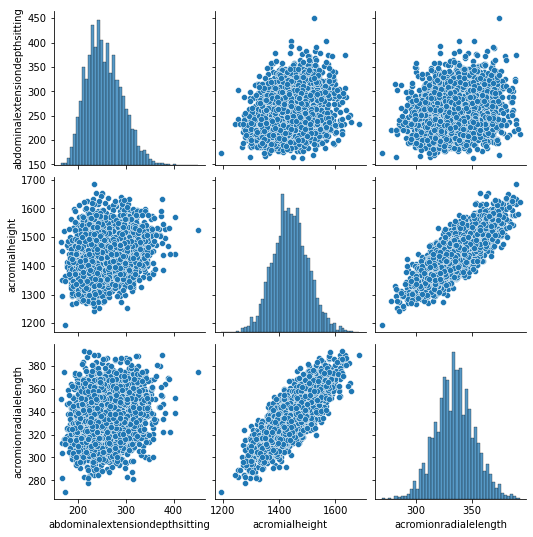

In [6]:
sns.pairplot(ansur.iloc[:,1:4])
plt.show()

Feature extraction is a method of reducing overall features by comibing other features.

In [7]:
health = pd.DataFrame({
    'Height': np.linspace(160, 180, 10),
    'Weight': np.linspace(180, 220, 10)
})
health

,Height,Weight
0,160.000000,180.000000
1,162.222222,184.444444
2,164.444444,188.888889
3,166.666667,193.333333
4,168.888889,197.777778
5,171.111111,202.222222
6,173.333333,206.666667
7,175.555556,211.111111
8,177.777778,215.555556
9,180.000000,220.000000


In [8]:
health['BMI'] = health['Weight']/(health['Height'])
health.drop(labels = ['Height', 'Weight'], axis = 1, inplace = True)
health

,BMI
0,1.125000
1,1.136986
2,1.148649
3,1.160000
4,1.171053
5,1.181818
6,1.192308
7,1.202532
8,1.212500
9,1.222222


## T-SNE for Dimensional Reduction

T-SNE reduces complexity in a dataset by keeping data points that are close to one another on a 3D+ dimensional space and fits them to a 2D space. 

In [9]:
cat_data = [col for col in ansur.columns if ansur[col].dtype == 'object']
numeric_ansur = ansur.drop(labels = cat_data, axis = 1)

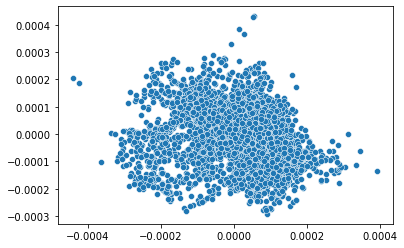

In [10]:
model = TSNE(learning_rate = 0.03)
tsne_features = model.fit_transform(numeric_ansur)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

sns.scatterplot(x = xs, y = ys)
plt.show()

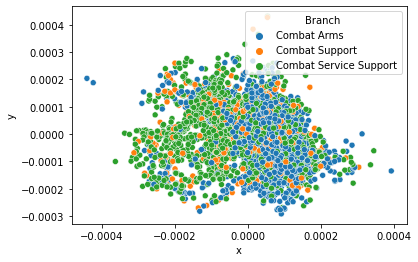

In [11]:
# To integrate with dataframe:
ansur['x'] = tsne_features[:,0]
ansur['y'] = tsne_features[:,1]

sns.scatterplot(x = 'x', y = 'y', hue = 'Branch', data = ansur)
plt.show()

You can tell if your data is randomly distributed, as shown above, or segmented.

# Feature Selection I - Selecting for Feature Information

We want high dimensional data, however, the more dimensions the more likely the model will overfit. We can avoid overfitting with dividing datasets by train and test sets. If the training accuracy and test accuracy are approximately equal, then the model didn't overfit. 

In [12]:
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target
X_name = iris_data.feature_names
y_name = iris_data.target_names

In [13]:
X_df = pd.DataFrame(X, columns= X_name)
y_df = pd.DataFrame(y, columns=['Target'])
iris = pd.concat([X_df, y_df], axis = 1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
y_df, X_df

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3)

model = SVC()
model.fit(X_train, y_train)

print('Accuracy of training set:', accuracy_score(y_train, model.predict(X_train)))
print('Accuarcy of testing set:', accuracy_score(y_test, model.predict(X_test)))

Accuracy of training set: 0.9714285714285714
Accuarcy of testing set: 1.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model doesn't overfit!

We can also use VarianceThreshold to reduce the number of features with little variance in out dataset. Remember, if there's no variance in a feature then it might be no good. If the age of every participant is 27 then the variance of age will be zero. 

In [15]:
ansur.shape

(4082, 110)

In [16]:
# Check ansur variance
(ansur / ansur.mean()).var()

Age                       0.085336
Branch                         NaN
Component                      NaN
DODRace                   0.390651
Date                           NaN
                          ...     
weightkg                  0.027648
wristcircumference        0.002591
wristheight               0.002416
x                     47363.564837
y                      6845.434462
Length: 110, dtype: float64

In [17]:
selector = VarianceThreshold(threshold=0.005) # Based on variances above
selector.fit(ansur/ansur.mean()) # Dividing by the mean normalizes the variance
mask = selector.get_support()

reduced_ansur = ansur.loc[:, mask]
reduced_ansur.shape

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


(4082, 33)

We can also evaluate features based on their correlation.

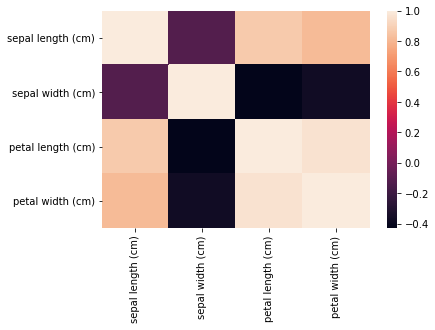

In [18]:
sns.heatmap(X_df.corr())
plt.show()

If correlations were 1 or -1 it would be wise to drop them. 

## Removing Highly Correlated Features

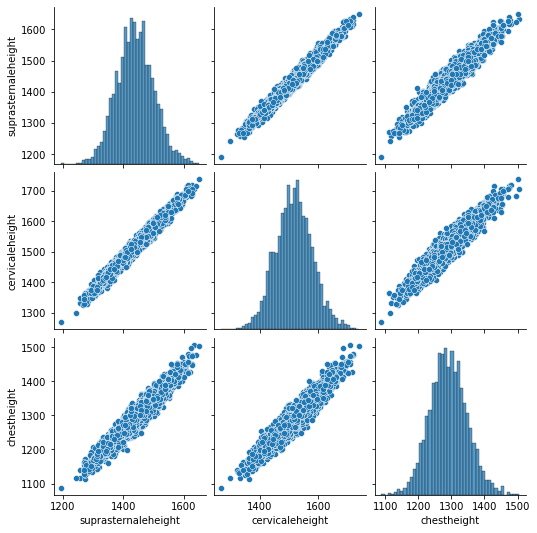

In [19]:
ansur_chest = ansur[['suprasternaleheight', 'cervicaleheight', 'chestheight']]
sns.pairplot(ansur_chest)
plt.show()

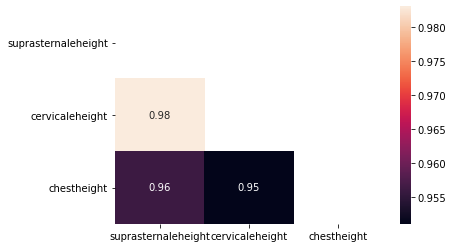

In [20]:
# Features are HIGHLY correlated
corr = ansur_chest.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True)
plt.show()

In [21]:
# To remove the features that are highly correlated
corr_df = ansur_chest.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype = bool))

tri_df = corr_df.mask(mask)
tri_df

,suprasternaleheight,cervicaleheight,chestheight
suprasternaleheight,NaN,NaN,NaN
cervicaleheight,0.983033,NaN,NaN
chestheight,0.956111,0.951101,NaN


In [22]:
to_drop = [col for col in ansur_chest.columns if any(tri_df[col] > 0.95)]
to_drop

['suprasternaleheight', 'cervicaleheight']

In [23]:
reduced_chest = ansur_chest.drop(labels = to_drop, axis = 1)
reduced_chest

,chestheight
0,1292
1,1244
2,1288
3,1205
4,1452
...,...
4077,1231
4078,1301
4079,1263
4080,1271


# Feature Selection II - Selecting for Model Accuracy

It's more pragmatic to reduce the dimensions of the data to increase model accuracy. 

In [24]:
X_train, X_test, y_train, y_test

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print(accuracy_score(y_test, y_preds))

1.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print(lr.coef_)

[[-0.37758667  0.84371527 -2.2606318  -0.96927967]
 [ 0.42970253 -0.11011116 -0.09771655 -0.8095054 ]
 [-0.05211586 -0.73360411  2.35834835  1.77878507]]


In [26]:
# Coefs for Target 1
dict(zip(iris_data.feature_names, abs(lr.coef_[0])))

{'sepal length (cm)': 0.37758667249599454,
 'sepal width (cm)': 0.8437152667000049,
 'petal length (cm)': 2.260631799700799,
 'petal width (cm)': 0.9692796650322805}

In [27]:
# Coefs for Target 2
dict(zip(iris_data.feature_names, abs(lr.coef_[1]))) 

{'sepal length (cm)': 0.4297025280094816,
 'sepal width (cm)': 0.1101111611698307,
 'petal length (cm)': 0.09771654710913376,
 'petal width (cm)': 0.8095054027613451}

In [28]:
# Coefs for Target 3
dict(zip(iris_data.feature_names, abs(lr.coef_[2])))

{'sepal length (cm)': 0.05211585551348917,
 'sepal width (cm)': 0.7336041055301751,
 'petal length (cm)': 2.358348346809925,
 'petal width (cm)': 1.7787850677936226}

The weakest coefficient across all three targets is 'speal lenght (cm)'

In [29]:
X_train.drop(labels = 'sepal length (cm)', axis = 1, inplace = True)
X_test.drop(labels = 'sepal length (cm)', axis = 1, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
lr_model_2 = LogisticRegression()
lr_model_2.fit(X_train, y_train)
y_preds = lr_model_2.predict(X_test)
print(accuracy_score(y_test, y_preds))

1.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model accuracy hasn't changed. For large datasets run time will be shorter.

Recursive Feature Elimination is a much better solution. It runs a model and drops the lowest coefficient. It re-runs until a desired amount of features are kept. 

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
model = LogisticRegression()

rfe = RFE(estimator = model, n_features_to_select = 2, verbose = True)
rfe.fit(X_train, y_train)

Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=True)

In [32]:
# To check what columns were kept
X_df.columns[rfe.support_]

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [33]:
# To check the iteration at which the feature was dropped
dict(zip(X_df.columns, rfe.ranking_))

{'sepal length (cm)': 3,
 'sepal width (cm)': 2,
 'petal length (cm)': 1,
 'petal width (cm)': 1}

## Tree-based feature selection

We can try remove unimportant features in random forests. 

In [34]:
X_train, X_valid, y_train, y_valid

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf.feature_importances_

array([0.10899546, 0.01865076, 0.47871916, 0.39363462])

In [35]:
mask = rf.feature_importances_ > 0.1
mask

array([ True, False,  True,  True])

In [36]:
X_df.loc[:,mask].columns

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

We can even reduce on something as large as the ANSUR dataset:

In [37]:
y = ansur.loc[:, 'Age']
cat_cols = [col for col in ansur.columns if ansur[col].dtype == 'object']
X = ansur.drop(labels = 'Age', axis = 1)
X.drop(labels = cat_cols, axis = 1, inplace = True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = 10, verbose = True, step = 10)
rfe.fit(X_train, y_train)

rfe.support_

Fitting estimator with 100 features.
Fitting estimator with 90 features.
Fitting estimator with 80 features.
Fitting estimator with 70 features.
Fitting estimator with 60 features.
Fitting estimator with 50 features.
Fitting estimator with 40 features.
Fitting estimator with 30 features.
Fitting estimator with 20 features.


array([ True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True])

In [39]:
X.loc[:, rfe.support_].columns

Index(['subjectid', 'anklecircumference', 'chestcircumference',
       'elbowrestheight', 'forearmforearmbreadth', 'interscyei',
       'thighcircumference', 'waistcircumference', 'x', 'y'],
      dtype='object')

# Feature Extraction

Combing features to create a new feature. BMI can be created using height and weight. Then we can drop height and weight, thereby reducing dimensionality.  

## Principal Component Analysis

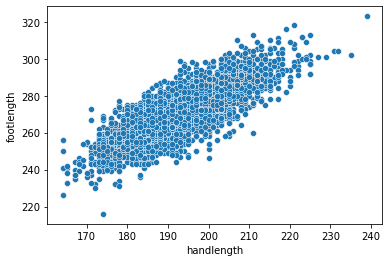

In [71]:
an_hand = ansur.handlength
an_leg = ansur.footlength

sns.scatterplot(x = an_hand, y = an_leg)
plt.show()

Data needs to be scaled first before applying PCA

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


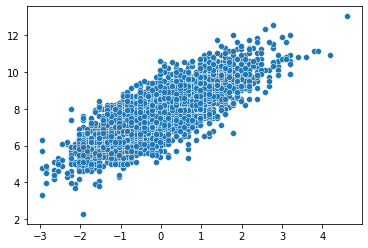

In [80]:
scaler = StandardScaler()
h_scaled = scaler.fit_transform(an_hand.to_numpy().reshape(-1,1))
l_scaled = scaler.transform(an_leg.to_numpy().reshape(-1,1))

sns.scatterplot(h_scaled.reshape(-1), l_scaled.reshape(-1))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


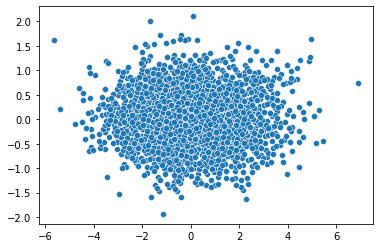

In [98]:
pca = PCA()

df = pd.DataFrame({
    'Hand': h_scaled.reshape(-1),
    'Leg': l_scaled.reshape(-1)
})

pca_df = pca.fit_transform(df)

X = pca_df[:,0]
y = pca_df[:,1]
sns.scatterplot(X, y)
plt.show()

PCA describes which component plays a larger role. Below, we can see that the first component describes 90% of variance. 

In [100]:
pca.explained_variance_ratio_

array([0.90233813, 0.09766187])

We could make an argument to drop 'footlenght' from our dataset so long as we keep 'handlenght'.

Lets investigate on the full ansur dataset.

In [106]:
numeric_ansur.drop('subjectid', axis = 1, inplace = True)
numeric_ansur

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,266,1467,337,222,1347,253,202,401,369,274,...,440,1054,815,175,853,1,1,41,71,180
1,233,1395,326,220,1293,245,193,394,338,257,...,371,1054,726,167,815,1,1,35,68,160
2,287,1430,341,230,1327,256,196,427,408,261,...,411,1041,929,180,831,2,2,42,68,205
3,234,1347,310,230,1239,262,199,401,359,262,...,399,968,794,176,793,1,1,31,66,175
4,250,1585,372,247,1478,267,224,435,356,263,...,379,1245,946,188,954,2,2,21,77,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,235,1353,312,216,1263,228,193,384,318,241,...,347,1016,675,163,778,51,1,22,67,160
4078,247,1473,336,234,1346,253,196,428,374,284,...,385,1082,896,178,873,1,1,22,71,194
4079,264,1394,313,227,1280,245,193,407,367,271,...,353,1011,832,178,822,1,1,23,67,186
4080,203,1417,327,223,1314,250,196,419,365,271,...,350,1062,731,172,837,1,1,22,69,165


In [122]:
scaler.fit_transform(numeric_ansur)
pca.fit_transform(numeric_ansur)

array([[ 1.25467373e+01,  4.51778565e+01, -1.50125462e+01, ...,
         8.84474770e-01,  3.18223746e-01,  1.51727998e-01],
       [ 2.62826848e+02,  1.52049628e+01, -1.04666099e+01, ...,
         1.39506306e+00,  3.71755963e-01, -3.52301931e-01],
       [-1.20723474e+02, -8.23813364e+01,  4.47226489e+00, ...,
         1.26318491e+00, -1.05954461e+00,  5.40468591e-01],
       ...,
       [ 1.60475644e+02, -2.12584373e+02, -1.97877886e+01, ...,
        -2.55946394e+00, -8.10108473e-01, -2.19684761e-01],
       [ 2.78274224e+02,  9.40775747e+01, -5.49685275e+00, ...,
         9.27017621e-02,  9.33266018e-02, -3.33466093e-01],
       [-3.68994822e+02,  8.53827119e+01,  5.88500260e+00, ...,
         1.49365749e+00, -1.06348705e-01, -5.35155340e-01]])

By applying cumsum to the explained_variance_ratio we can decide how many componenets to keep. For example, if we keep the first 7 principal componenets, we will be able to explain more than 90% of the variance in the 98 feature dataset!

In [123]:
pca.explained_variance_ratio_.cumsum()

array([0.55175736, 0.78432385, 0.82587898, 0.85895361, 0.88000609,
       0.89557809, 0.90948986, 0.91817222, 0.92534904, 0.93150077,
       0.93652773, 0.94101931, 0.945261  , 0.94889696, 0.95238064,
       0.9556691 , 0.95867157, 0.96123269, 0.96357436, 0.9657689 ,
       0.9678203 , 0.96964772, 0.97138989, 0.97302784, 0.97449846,
       0.97593881, 0.97723555, 0.97846571, 0.97964639, 0.98074743,
       0.98176038, 0.98267885, 0.98358518, 0.98442154, 0.98522159,
       0.98600585, 0.98675808, 0.98746569, 0.9881235 , 0.98875523,
       0.98933217, 0.9898828 , 0.99036217, 0.99083715, 0.99129771,
       0.99172058, 0.99212143, 0.99250406, 0.99286147, 0.99320285,
       0.99352192, 0.9938365 , 0.99413158, 0.99441687, 0.99469569,
       0.99495783, 0.99521216, 0.99546407, 0.99570025, 0.995933  ,
       0.99616194, 0.99637533, 0.99658592, 0.99679434, 0.99699779,
       0.99718818, 0.99737333, 0.99755269, 0.99772108, 0.99788467,
       0.99804049, 0.99819499, 0.9983386 , 0.99848013, 0.99860

We can check the effect of pcs on categorical columns:

In [129]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

pc = pipe.fit_transform(numeric_ansur)
pc[:,0]

array([ 0.12741532,  5.47175246, -2.47904789, ...,  4.83362288,
        4.84025823, -9.64461235])

<ipython-input-136-0944b733b5b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_ansur['PC 1'] = pc[:,0]
<ipython-input-136-0944b733b5b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_ansur['PC 2'] = pc[:,1]


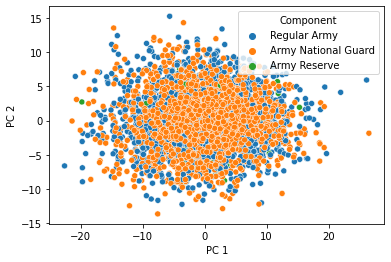

In [136]:
cat_ansur['PC 1'] = pc[:,0]
cat_ansur['PC 2'] = pc[:,1]

sns.scatterplot(x = 'PC 1', y = 'PC 2', hue = 'Component', data = cat_ansur)
plt.show()

If we change n_components to a value between 0 and 1 it will instead keep enough components to explain that much variance. 